## Imports

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [50]:
PATH = '/Users/hitesh/CSCI566/swarm-guard/dataset'
train_path = os.path.join(PATH, 'train')
test_path = os.path.join(PATH, 'test')

In [51]:
def extract_tweet_texts(train_path):
    rows = []
    for filename in os.listdir(train_path):
        if filename.endswith('.json'):
            file_path = os.path.join(train_path, filename)
            
            try:
                with open(file_path, 'r', encoding='utf-8') as F:
                    data = json.load(F)
                    for node in data.get('nodes', []):
                        row = {
                            'id': node.get('id'),
                            'user_id': node.get('user_id'),
                            'tweet_text': node.get('tweet_text', '')
                        }
                        rows.append(row)
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    
    return pd.DataFrame(rows, columns=['id', 'user_id', 'tweet_text'])

train_df = extract_tweet_texts(train_path)
test_df = extract_tweet_texts(test_path)

### Train analysis

Shape(285357, 4)
id              0
user_id         0
tweet_text      0
tweet_length    0
dtype: int64
Duplicates: 0


Text(0, 0.5, 'Frequency')

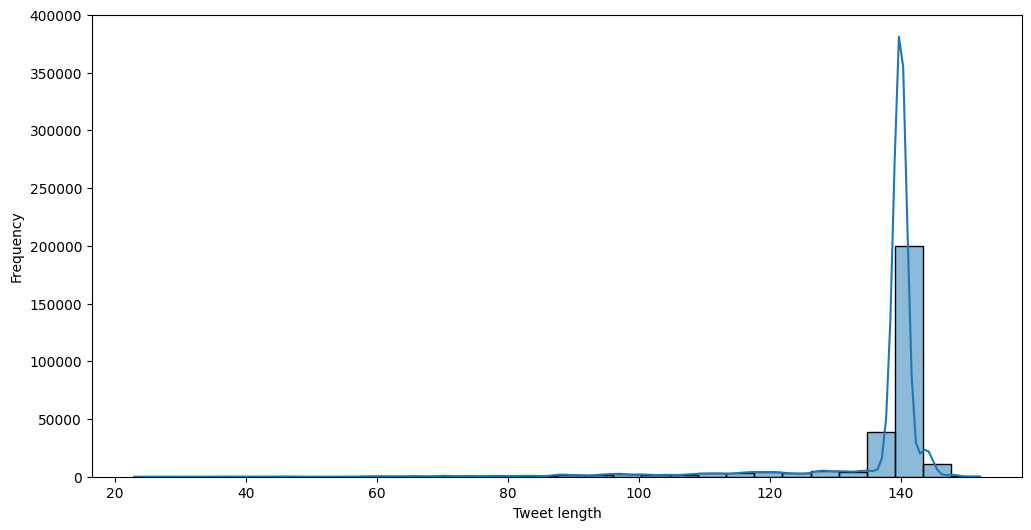

In [57]:
print(f'Shape{train_df.shape}')
print(f'{train_df.isnull().sum()}')
print(f'Duplicates: {train_df.duplicated().sum()}')
train_df['tweet_length'] = train_df['tweet_text'].apply(len) # shows len column
train_df['tweet_length'].describe()

# Plot the distribution of tweet lengths
plt.figure(figsize=(12, 6))
sns.histplot(train_df['tweet_length'], bins=30, kde=True)
plt.xlabel('Tweet length')
plt.ylabel('Frequency')